<a href="https://colab.research.google.com/github/urtbest86/MLOps/blob/master/211016_label%EC%A0%9C%EC%99%B8_%EC%8A%A4%EC%BC%80%EC%9D%BC%EB%A7%81_%EC%A4%91.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

## GitHub에서 데이터셋 가져오기



In [2]:
from google.colab import files
import os
DATA_PATH="https://raw.githubusercontent.com/urtbest86/MLOps/master/result_train_dataset.csv"
df = pd.read_csv(DATA_PATH)
df

,Date,Mean Temperature(°C),Minimum Temperature(°C),Maximum Temperature(°C),Precipitation(mm),Mean Wind Speed (m/s),Minimum Relative Humidity(%),Mean Relative Humidity(%),Duration of Sunshine(hr),Mean Surface Temperature(°C),Minimum Grass Temperature(°C),Cumulative Precipitation (mm),Mosquito Value
0,2021-08-31,20.5,18.1,23.1,77.4,2.3,77,93.3,0.0,21.2,17.8,78.2,82.0
1,2021-08-30,24.2,21.2,27.7,0.0,1.4,57,77.5,1.1,25.3,19.0,0.0,82.6
2,2021-08-29,23.7,21.9,26.3,0.9,1.6,65,82.6,1.0,24.3,19.1,0.9,79.3
3,2021-08-28,23.6,19.7,28.2,0.0,1.8,57,80.4,3.8,25.1,17.1,0.0,83.0
4,2021-08-27,22.4,20.4,25.5,0.9,1.3,67,83.5,0.0,23.1,17.6,0.9,79.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1006,2016-05-05,18.9,10.2,26.9,7.5,1.7,17,50.8,10.9,20.0,3.6,17.0,24.4
1007,2016-05-04,15.7,10.2,20.6,0.0,5.1,28,46.6,12.8,16.6,8.9,0.0,25.6
1008,2016-05-03,12.9,8.9,17.6,27.0,4.9,72,86.1,0.0,14.8,8.5,27.0,30.4
1009,2016-05-02,21.1,16.5,28.4,16.5,2.2,33,64.5,7.5,24.4,12.1,43.5,27.4


In [3]:
DATA_PATH="https://raw.githubusercontent.com/urtbest86/MLOps/master/result_test_dataset.csv"
test = pd.read_csv(DATA_PATH)
test

,Date,Mean Temperature(°C),Minimum Temperature(°C),Maximum Temperature(°C),Precipitation(mm),Mean Wind Speed (m/s),Minimum Relative Humidity(%),Mean Relative Humidity(%),Duration of Sunshine(hr),Mean Surface Temperature(°C),Minimum Grass Temperature(°C),Cumulative Precipitation (mm),Mosquito Value
0,2021-10-14,19.7,17.4,23.9,0.0,2.0,54,73.6,6.1,20.9,13.8,0.0,54.0
1,2021-10-13,19.6,14.9,25.2,0.0,2.4,52,66.6,9.0,19.3,11.0,0.0,43.2
2,2021-10-12,17.9,15.8,21.3,0.0,3.3,53,67.1,3.0,18.2,13.1,0.0,51.0
3,2021-10-11,15.2,12.6,17.8,0.3,2.2,67,78.6,1.7,18.0,12.3,0.3,63.1
4,2021-10-10,19.9,14.9,24.3,14.2,2.2,80,89.0,0.0,20.6,14.3,14.5,59.7
5,2021-10-09,20.9,18.5,24.1,0.4,2.3,72,83.5,1.9,20.5,16.4,14.6,61.1
6,2021-10-08,18.8,17.5,20.0,3.5,1.7,85,91.3,0.0,19.8,15.1,3.9,61.1
7,2021-10-07,19.4,17.9,21.9,4.6,1.9,74,85.5,0.0,20.6,15.2,8.1,73.9
8,2021-10-06,18.8,17.9,21.7,6.4,2.8,83,91.5,1.2,20.2,16.4,11.0,65.5
9,2021-10-05,23.6,21.7,26.5,0.0,3.3,65,82.4,1.5,23.2,20.8,0.0,58.4


In [4]:
train=df.sample(frac=0.8)
val=df.sample(frac=0.2)

In [5]:
train_data_set = train.values
x_train = train_data_set[:, 2:-1].astype(float)
mean = x_train.mean(axis=0)
x_train -= mean
std = x_train.std(axis=0)
x_train /= std
y_train = train_data_set[:, -1].astype(float)

test_data_set = test.values
x_test = test_data_set[:, 2:-1].astype(float)
x_test -= mean
x_test /= std
y_test = test_data_set[:, -1].astype(float)

val_data_set = val.values
x_val = val_data_set[:, 2:-1].astype(float)
x_val -= mean
x_val /= std
y_val = val_data_set[:, -1].astype(float)

print(x_train)
print("===")
print(y_train)

[[ 0.27053826 -0.22068737 -0.31403349 ... -0.11544512  0.28743867
   0.26804588]
 [-0.81468417 -1.14734525 -0.34570777 ... -0.65140371 -0.76976687
  -0.33303157]
 [ 1.06146308  0.78834009 -0.33937292 ...  0.33406853  1.13951477
  -0.33057819]
 ...
 [-0.22608895 -0.59135052  0.38280075 ... -0.4093579   0.17698436
  -0.05089318]
 [ 1.44772869  0.7471553  -0.26968949 ...  0.38593549  1.42354014
   1.88482155]
 [-1.8263322  -2.44466628  0.16108076 ... -2.17283454 -1.24314248
  -0.09505397]]
===
[ 51.6  52.6  90.3  79.7  32.8  80.9  16.2   8.7  52.5  58.8  57.2  45.6
  93.1  19.1   8.5  45.9  27.4  53.9  70.8  86.   61.3  46.1 100.   23.4
  53.9  37.2  92.4  69.2  64.7  31.6  41.7  17.8  47.6  54.    9.2  60.5
  54.   79.5  19.1  53.   25.7  67.5  61.   34.5  33.6  57.1  52.3  96.5
  39.   55.1  39.5 100.   66.5  81.7  12.9   5.3  36.3  40.9  64.8  45.4
  59.2  26.9  37.6  48.3  33.9  68.5  54.8   9.7  31.   11.7  82.  100.
  22.8  19.1  92.4  61.1  62.7  13.1  33.9  64.1  81.6  86.5  25.6 

### 모델 구성

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(1024, input_dim = 10, activation='relu'))
model.add(Dense(500,activation='relu'))
model.add(Dense(300,activation='relu'))
model.add(Dense(200,activation='relu'))
model.add(Dense(1))

### 모델 학습과정 설정

In [7]:
model.compile(loss='mse', optimizer='adam',metrics=['mae'])

### 모델 학습 + 학습과정 및 결과보기

In [8]:
hist=model.fit(x_train, y_train, epochs=1000, batch_size=4,validation_data=(x_val,y_val))

Epoch 1/1000
203/203 [==============================] - 3s 10ms/step - loss: 867.9723 - mae: 23.3346 - val_loss: 510.2362 - val_mae: 17.2151
Epoch 2/1000
203/203 [==============================] - 2s 9ms/step - loss: 545.3681 - mae: 18.3558 - val_loss: 473.5770 - val_mae: 16.6237
Epoch 3/1000
203/203 [==============================] - 2s 9ms/step - loss: 531.3851 - mae: 18.1633 - val_loss: 412.8044 - val_mae: 15.8408
Epoch 4/1000
203/203 [==============================] - 2s 9ms/step - loss: 491.1203 - mae: 17.4709 - val_loss: 436.5775 - val_mae: 16.3724
Epoch 5/1000
203/203 [==============================] - 2s 9ms/step - loss: 484.8558 - mae: 17.2085 - val_loss: 443.1958 - val_mae: 16.5656
Epoch 6/1000
203/203 [==============================] - 2s 9ms/step - loss: 433.8586 - mae: 16.4431 - val_loss: 455.5549 - val_mae: 16.4152
Epoch 7/1000
203/203 [==============================] - 2s 9ms/step - loss: 463.4725 - mae: 16.7554 - val_loss: 368.2435 - val_mae: 15.0548
Epoch 8/1000
203/20

### mae와 val_mae 비교

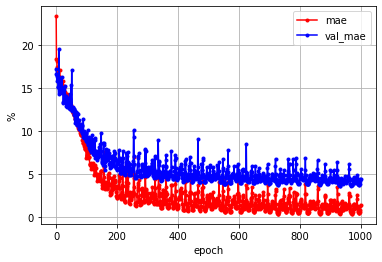

In [9]:
import matplotlib.pyplot as plt

y_mae = hist.history['mae']
y_val_mae = hist.history['val_mae']#x_len = np.arange(len(y_loss)) 

x_len = np.arange(1000)
plt.plot(x_len, y_mae, marker='.', c='red', label="mae")
plt.plot(x_len, y_val_mae, marker='.', c='blue', label="val_mae")

# plt.plot(x_len, hist.history['val_loss'], marker='.', c='green', label="val_mse")
# plt.plot(x_len, hist.history['val_mae'], marker='.', c='black', label="val_mae")

plt.legend(loc='upper right')
plt.grid()
#plt.xlim(0,150)
plt.xlabel('epoch')
plt.ylabel('%')
plt.show()

### mse(loss)와 val_mse 비교

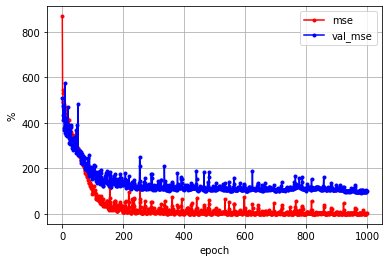

In [10]:
import matplotlib.pyplot as plt

y_mse = hist.history['loss']
y_val_mse = hist.history['val_loss']#x_len = np.arange(len(y_loss)) 

x_len = np.arange(1000)
plt.plot(x_len, y_mse, marker='.', c='red', label="mse")
plt.plot(x_len, y_val_mse, marker='.', c='blue', label="val_mse")

# plt.plot(x_len, hist.history['val_loss'], marker='.', c='green', label="val_mse")
# plt.plot(x_len, hist.history['val_mae'], marker='.', c='black', label="val_mae")

plt.legend(loc='upper right')
plt.grid()
#plt.xlim(0,150)
plt.xlabel('epoch')
plt.ylabel('%')
plt.show()

### mae와 mse 비교

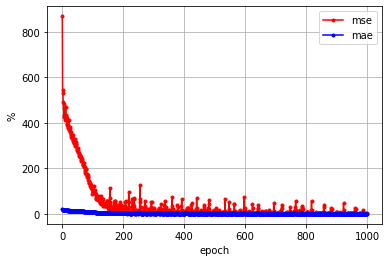

In [11]:
import matplotlib.pyplot as plt

y_mse = hist.history['loss']
y_mae = hist.history['mae']#x_len = np.arange(len(y_loss)) 

x_len = np.arange(1000)
plt.plot(x_len, y_mse, marker='.', c='red', label="mse")
plt.plot(x_len, y_mae, marker='.', c='blue', label="mae")

# plt.plot(x_len, hist.history['val_loss'], marker='.', c='green', label="val_mse")
# plt.plot(x_len, hist.history['val_mae'], marker='.', c='black', label="val_mae")

plt.legend(loc='upper right')
plt.grid()
#plt.xlim(0,150)
plt.xlabel('epoch')
plt.ylabel('%')
plt.show()

In [12]:
print('## training loss and acc ##')
print(hist.history['loss'])
print(hist.history['mae'])

## training loss and acc ##
[867.9722900390625, 545.3681030273438, 531.3850708007812, 491.12030029296875, 484.8558349609375, 433.8585510253906, 463.4725341796875, 425.3041687011719, 421.39794921875, 434.40478515625, 414.3318786621094, 469.3792724609375, 433.8739318847656, 431.1695251464844, 420.6199645996094, 410.1852111816406, 396.24639892578125, 389.2806396484375, 378.2458190917969, 380.16680908203125, 392.06500244140625, 379.6273193359375, 412.3304138183594, 368.45916748046875, 360.601318359375, 375.1154479980469, 383.9289245605469, 357.8173522949219, 348.06689453125, 339.59539794921875, 351.4239501953125, 342.9991149902344, 333.63720703125, 332.9571228027344, 347.3113708496094, 325.17095947265625, 321.432861328125, 331.201416015625, 311.580810546875, 314.26068115234375, 312.787109375, 304.01849365234375, 298.7270812988281, 330.52789306640625, 308.92578125, 304.4246520996094, 316.16326904296875, 287.93682861328125, 282.02996826171875, 278.909423828125, 291.43829345703125, 272.241394

### 모델 평가

In [13]:
loss_and_metrics = model.evaluate(x_test, y_test, batch_size=32)
print('## evaluation loss and_metrics ##')
print(loss_and_metrics)

2/2 [==============================] - 0s 8ms/step - loss: 381.2310 - mae: 15.0756
## evaluation loss and_metrics ##
[381.23095703125, 15.075626373291016]


In [14]:
print(model.predict(x_test))
print(y_test)

[[54.935986]
 [79.08601 ]
 [58.695232]
 [48.789207]
 [61.747135]
 [58.72454 ]
 [60.76064 ]
 [65.69948 ]
 [69.6376  ]
 [66.470764]
 [92.6204  ]
 [51.00944 ]
 [51.47365 ]
 [37.604183]
 [50.3761  ]
 [53.271324]
 [56.142452]
 [37.539764]
 [50.94469 ]
 [66.56043 ]
 [68.12062 ]
 [57.729683]
 [57.691475]
 [40.474277]
 [45.52358 ]
 [70.79641 ]
 [46.385986]
 [76.026375]
 [42.237625]
 [47.647163]
 [50.46658 ]
 [72.37041 ]
 [40.793625]
 [49.009544]
 [65.726456]
 [53.359257]
 [64.19993 ]
 [54.900787]
 [69.548744]
 [51.116287]
 [33.651447]
 [77.62739 ]
 [60.60649 ]
 [53.693157]]
[54.  43.2 51.  63.1 59.7 61.1 61.1 73.9 65.5 58.4 56.  57.7 54.7 60.7
 66.8 63.8 62.8 63.1 70.2 70.5 70.5 63.1 61.7 72.2 74.5 67.1 69.5 77.9
 79.9 79.9 71.8 71.5 76.2 76.2 71.5 76.9 71.5 70.2 74.5 76.6 73.9 79.6
 79.6 81.6]


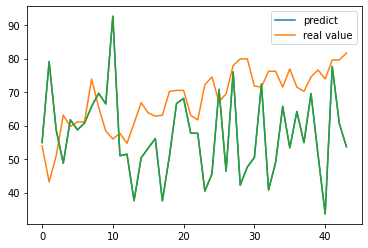

In [15]:
plt.plot(model.predict(x_test),label='predict')
plt.plot(y_test, label='real value')
plt.plot(model.predict(x_test))
# plt.plot(model.predict(x_test)-y_test)
#plt.xlim(0,20)
plt.legend()
plt.show()